In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor 
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from joblib import dump,load

In [2]:
GDP1=pd.read_excel(r"C:\Users\iT HOME\PycharmProjects\GDP project file\GDP after dummies.xlsx")
GDP1.head()

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),...,Region_C.W. OF IND. STATES,Region_EASTERN EUROPE,Region_LATIN AMER. & CARIB,Region_NEAR EAST,Region_NORTHERN AFRICA,Region_NORTHERN AMERICA,Region_OCEANIA,Region_SUB-SAHARAN AFRICA,Region_WESTERN EUROPE,Country_id
0,31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,...,0,0,0,0,0,0,0,0,0,0
1,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,...,0,1,0,0,0,0,0,0,0,1
2,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,...,0,0,0,0,1,0,0,0,0,2
3,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,...,0,0,0,0,0,0,1,0,0,3
4,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,...,0,0,0,0,0,0,0,0,1,4


In [3]:
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    
    return mae, mse, rmse, r2_square

In [4]:
y = GDP1['GDP ($ per capita)']
X = GDP1.drop(['GDP ($ per capita)'], axis=1)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101,shuffle=True)

In [6]:
gbm1 = GradientBoostingRegressor(learning_rate=0.1, n_estimators=200)
gbm1.fit(X_train, y_train)

GradientBoostingRegressor(n_estimators=200)

In [7]:
gbm1_pred = gbm1.predict(X_test)
dfff = pd.DataFrame(data=y_test)
df9 = pd.DataFrame(data=gbm1_pred)
df9.index = dfff.index

dff=pd.concat([dfff,df9],axis=1,ignore_index=False)
dff.columns=['Actual','Predicted']
dff

,Actual,Predicted
65,700.000000,779.916205
54,31100.000000,39261.806796
185,13300.000000,13250.386401
80,20000.000000,17363.381765
33,600.000000,1149.116867
201,7400.000000,4768.498390
37,1400.000000,3601.994562
218,4800.000000,9622.442841
199,1000.000000,376.896506
66,22000.000000,24692.110858


In [8]:
print('Gradiant Boosting Performance:')

print('\nall features, No scaling:')
accuracy=gbm1.score(X_test,y_test)
train=gbm1.score(X_train,y_train) 
results_df = pd.DataFrame(data=[["gradient boosting perfromance",*evaluate(y_test, gbm1_pred) ,train,accuracy]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Train_Accuracy","Test_Accuracy"])
result_df=results_df
results_df

Gradiant Boosting Performance:

all features, No scaling:


,Model,MAE,MSE,RMSE,R2 Square,Train_Accuracy,Test_Accuracy
0,gradient boosting perfromance,2475.541931,1.410253e+07,3755.333624,0.827249,0.999404,0.827249


In [9]:
fi=np.array(gbm1.feature_importances_)
print(fi)

[2.53153675e-02 3.77088952e-03 2.38826294e-03 1.66708826e-02
 2.58492131e-02 4.90840804e-02 3.00687123e-02 6.85240536e-01
 1.82268182e-03 2.81920290e-02 7.00020180e-03 9.03924812e-04
 8.70101636e-03 7.07695573e-03 9.05068171e-02 4.14280783e-03
 5.63575059e-03 1.60040152e-05 0.00000000e+00 2.56006823e-04
 3.93362594e-04 5.44667284e-05 5.21691943e-05 0.00000000e+00
 2.00906282e-04 3.98059708e-07 0.00000000e+00 1.09695913e-04
 6.54686140e-03]


<AxesSubplot:>

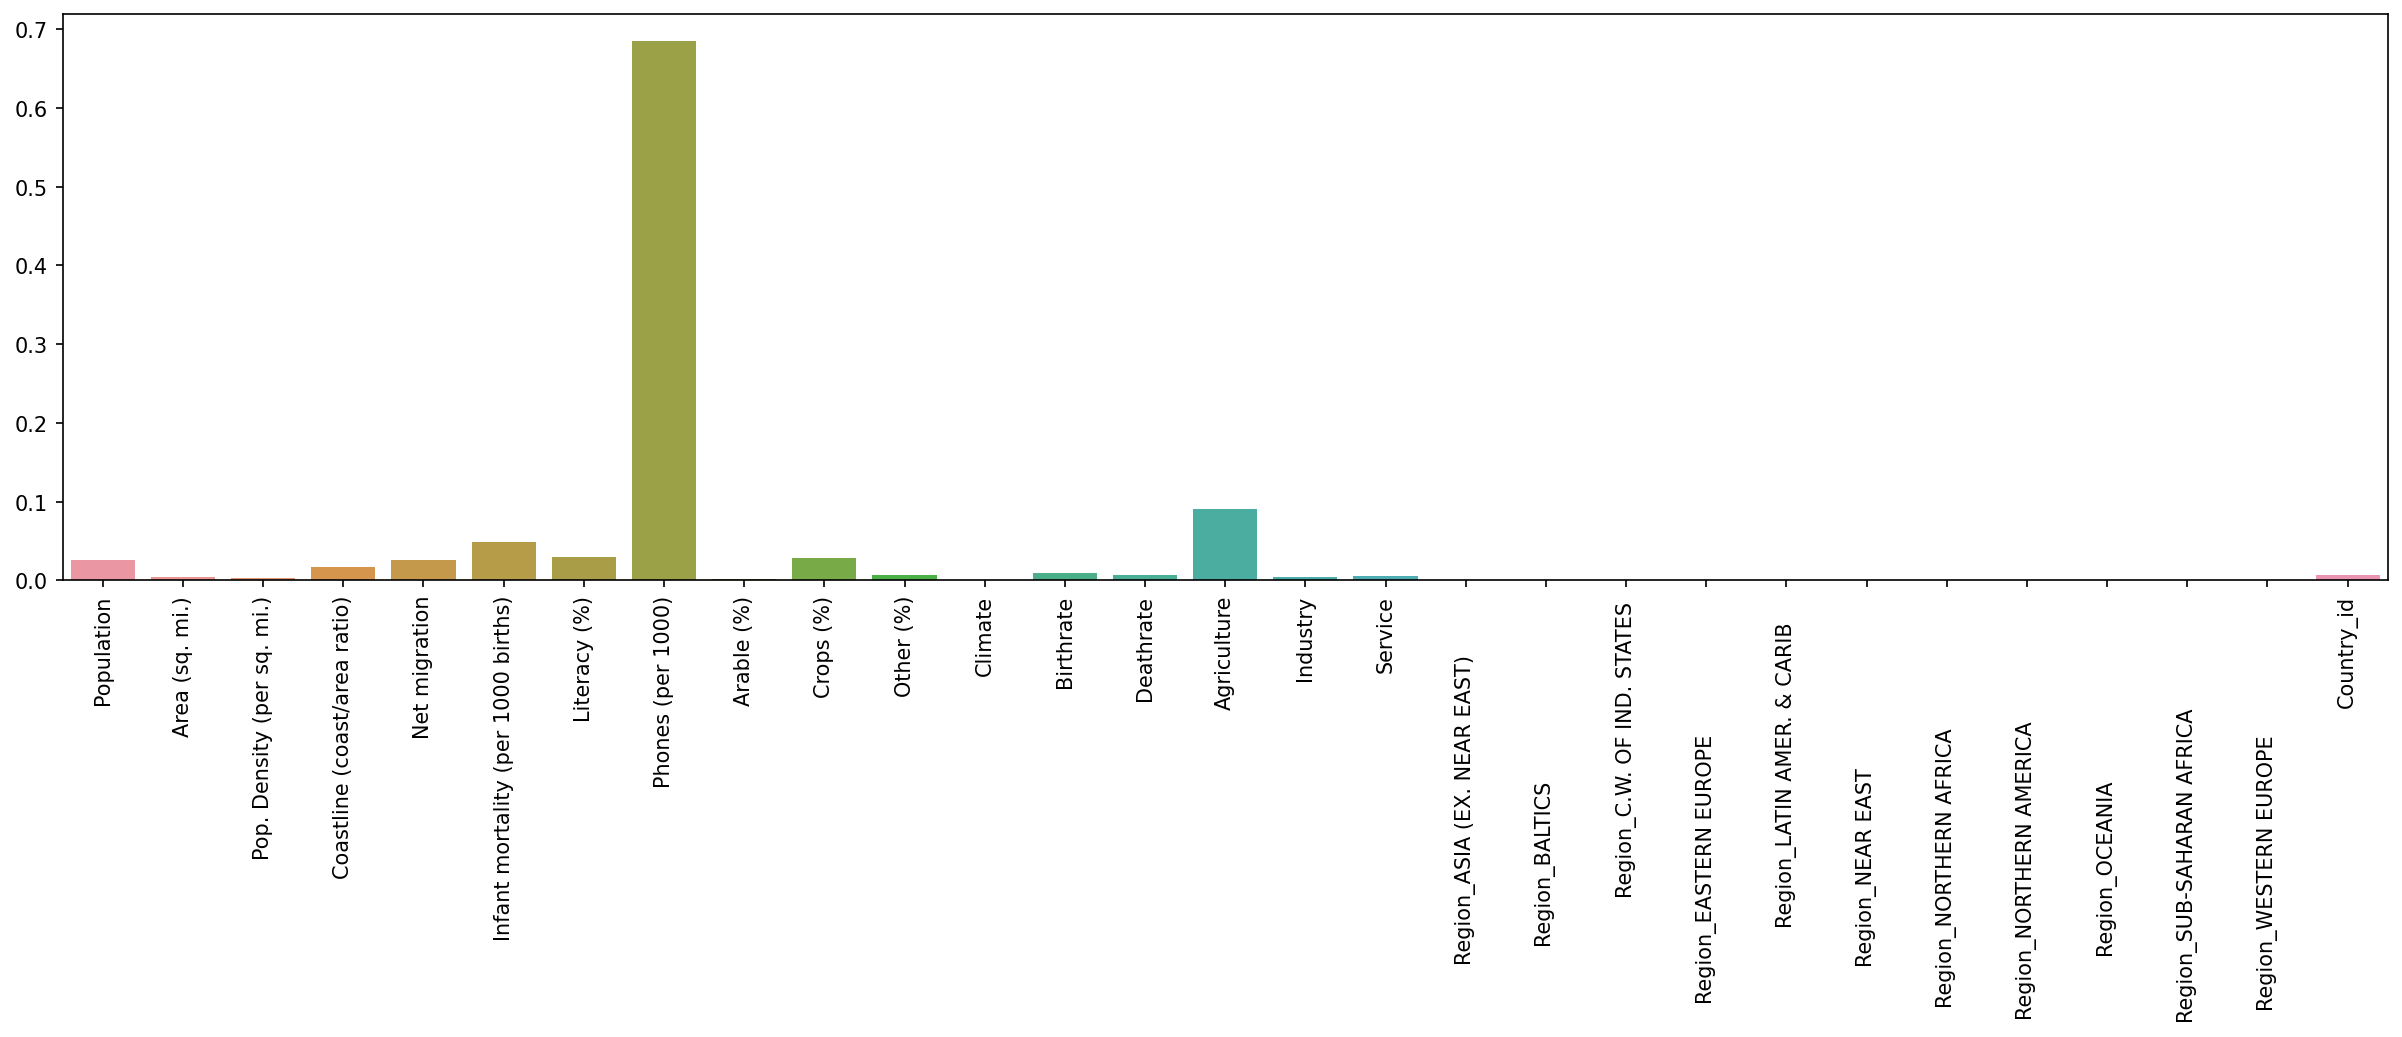

In [10]:
plt.figure(figsize=(20,5),dpi=150)
plt.xticks(rotation=90)
sns.barplot(x=X.columns,y=fi)

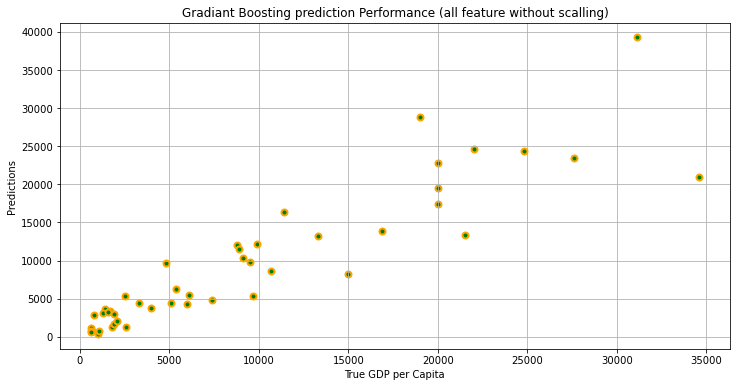

In [11]:
fig = plt.figure(figsize=(12, 6))
plt.scatter(y_test,gbm1_pred,color='green', linewidths=2, edgecolors='orange')
plt.xlabel('True GDP per Capita') 
plt.ylabel('Predictions') 
plt.title('Gradiant Boosting prediction Performance (all feature without scalling)') 
plt.grid()
plt.show()

In [12]:
sc_X = StandardScaler()
X2_train = sc_X.fit_transform(X_train)
X2_test = sc_X.fit_transform(X_test)
y2_train = y_train
y2_test = y_test

In [13]:
gbm2 = GradientBoostingRegressor(learning_rate=0.1, n_estimators=200)
gbm2.fit(X2_train, y2_train)

GradientBoostingRegressor(n_estimators=200)

In [14]:
gbm2_pred = gbm2.predict(X2_test)
dfff = pd.DataFrame(data=y_test)
df9 = pd.DataFrame(data=gbm2_pred)
df9.index = dfff.index

dff=pd.concat([dfff,df9],axis=1,ignore_index=False)
dff.columns=['Actual','Predicted']
dff

,Actual,Predicted
65,700.000000,-487.468155
54,31100.000000,19053.678850
185,13300.000000,13822.834742
80,20000.000000,10511.417779
33,600.000000,993.464057
201,7400.000000,5284.833425
37,1400.000000,1567.013602
218,4800.000000,10175.546830
199,1000.000000,-545.284947
66,22000.000000,16034.735461


In [15]:
print('Gradiant Boosting Performance:')
print('\nall features, with scaling:')
accuracy=gbm2.score(X2_test,y2_test)
train=gbm2.score(X2_train,y2_train) 
results_df = pd.DataFrame(data=[["gradient boosting perfromance",*evaluate(y2_test, gbm2_pred) ,train,accuracy]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Train_Accuracy","Test_Accuracy"])
result_df=results_df
results_df

Gradiant Boosting Performance:

all features, with scaling:


,Model,MAE,MSE,RMSE,R2 Square,Train_Accuracy,Test_Accuracy
0,gradient boosting perfromance,3150.589138,2.012482e+07,4486.069371,0.753478,0.999404,0.753478


In [16]:
fi=np.array(gbm2.feature_importances_)
print(fi)

[2.71887688e-02 3.44689187e-03 2.34542264e-03 1.65115513e-02
 2.88488734e-02 4.73614593e-02 3.01569914e-02 6.85281636e-01
 2.47911305e-03 2.82157098e-02 6.85897157e-03 1.29810377e-03
 1.06023811e-02 6.33881407e-03 8.86285362e-02 4.14955555e-03
 3.18405509e-03 9.92071110e-06 0.00000000e+00 2.54558330e-04
 4.35431740e-04 5.16846251e-05 5.20591755e-05 0.00000000e+00
 2.01304341e-04 4.46376142e-06 0.00000000e+00 1.08717131e-04
 5.98502570e-03]


<AxesSubplot:>

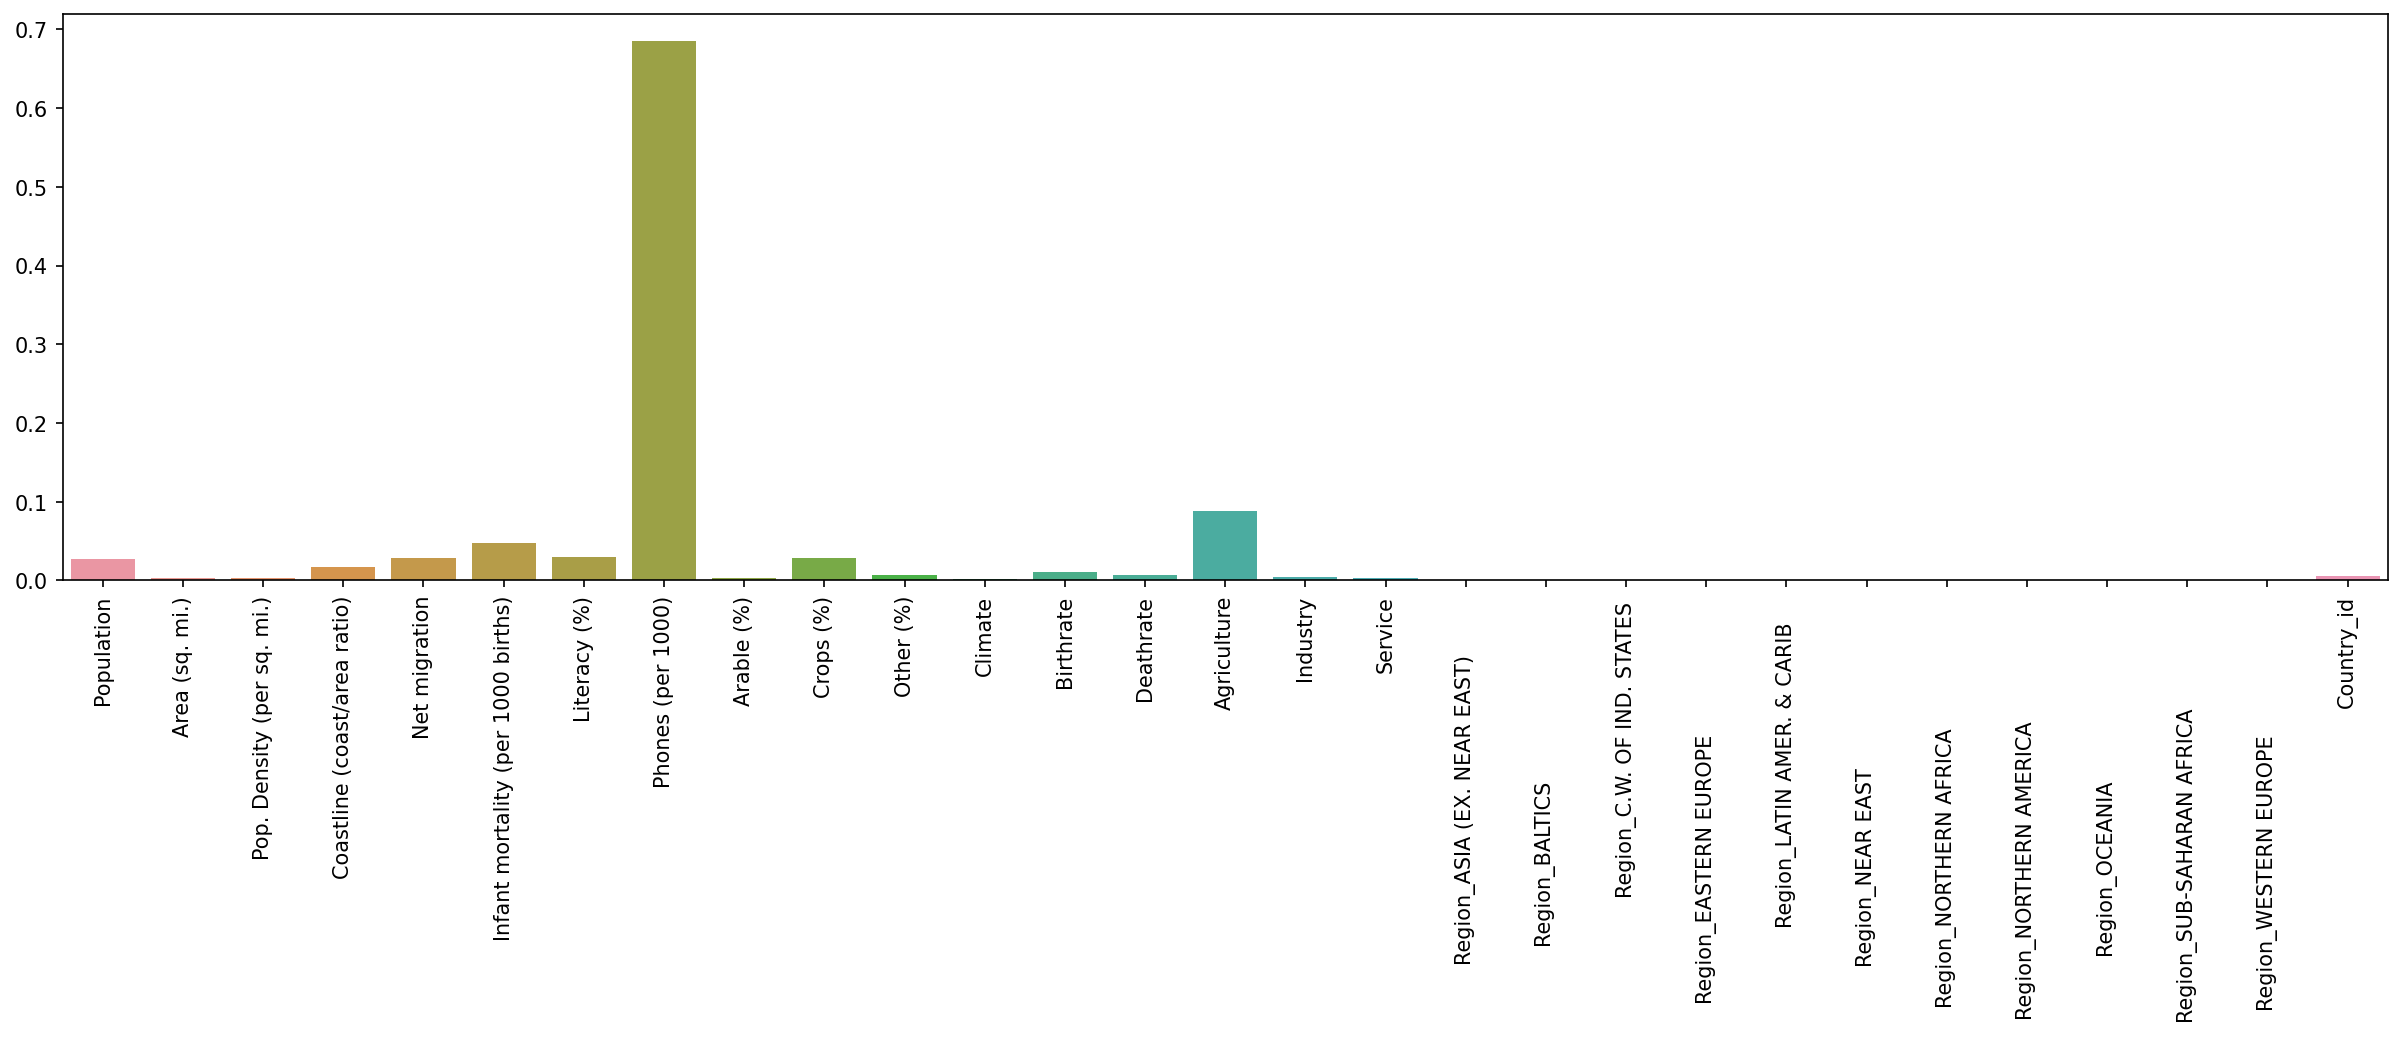

In [17]:
plt.figure(figsize=(20,5),dpi=150)
plt.xticks(rotation=90)
sns.barplot(x=X.columns,y=fi)

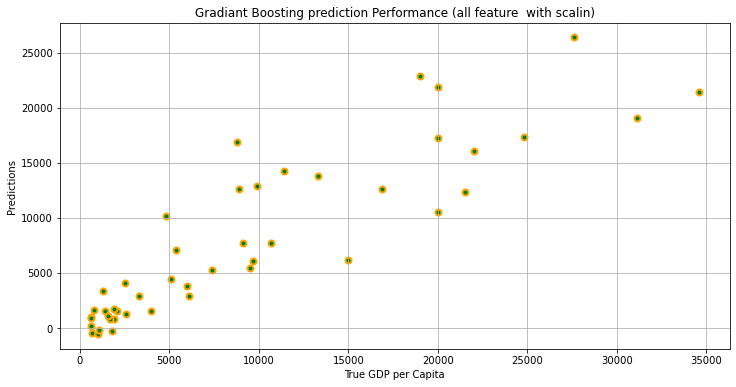

In [18]:
fig = plt.figure(figsize=(12, 6))
plt.scatter(y2_test,gbm2_pred,color='green', linewidths=2, edgecolors='orange')
plt.xlabel('True GDP per Capita') 
plt.ylabel('Predictions') 
plt.title('Gradiant Boosting prediction Performance (all feature  with scalin)') 
plt.grid()
plt.show()

In [19]:
y3 = y
X3 = GDP1.drop(["Pop. Density (per sq. mi.)",'GDP ($ per capita)', 'Arable (%)',
                        'Climate', 'Deathrate',"Industry","Service" ], axis=1)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=101,shuffle=True)

In [20]:
gbm3 = GradientBoostingRegressor(learning_rate=0.1, n_estimators=200)
gbm3.fit(X3_train, y3_train)

GradientBoostingRegressor(n_estimators=200)

In [21]:
gbm3_pred = gbm3.predict(X3_test)
dfff = pd.DataFrame(data=y_test)
df9 = pd.DataFrame(data=gbm3_pred)
df9.index = dfff.index

dff=pd.concat([dfff,df9],axis=1,ignore_index=False)
dff.columns=['Actual','Predicted']
dff

,Actual,Predicted
65,700.000000,1192.947659
54,31100.000000,39312.484398
185,13300.000000,12944.609658
80,20000.000000,17636.638592
33,600.000000,1084.145905
201,7400.000000,4895.686000
37,1400.000000,5187.448963
218,4800.000000,7097.255579
199,1000.000000,1016.093447
66,22000.000000,24479.133651


In [47]:
print('Gradiant Boosting Performance:')
print('\slected features, No scaling:')
accuracy=gbm3.score(X3_test,y3_test)
train=gbm3.score(X3_train,y3_train) 
results_df = pd.DataFrame(data=[["gradient boosting perfromance",*evaluate(y_test, gbm3_pred) ,train,accuracy]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Train_Accuracy","Test_Accuracy"])
result_df=results_df
results_df

Gradiant Boosting Performance:
\slected features, No scaling:


,Model,MAE,MSE,RMSE,R2 Square,Train_Accuracy,Test_Accuracy
0,gradient boosting perfromance,2174.207651,9.311095e+06,3051.408755,0.885942,0.999127,0.885942


In [46]:
fi=np.array(gbm3.feature_importances_)
print(fi)

[2.60761168e-02 5.32661724e-03 1.78186420e-02 3.51519789e-02
 5.58480762e-02 2.86410415e-02 6.84709309e-01 2.88628128e-02
 8.37844033e-03 9.75676795e-03 9.13561222e-02 1.28993578e-04
 0.00000000e+00 2.14912261e-04 1.85158493e-04 8.09891786e-05
 2.29942300e-04 2.40482572e-04 3.14297516e-04 8.85524905e-05
 9.20585659e-05 2.73690762e-04 6.22499781e-03]


<AxesSubplot:>

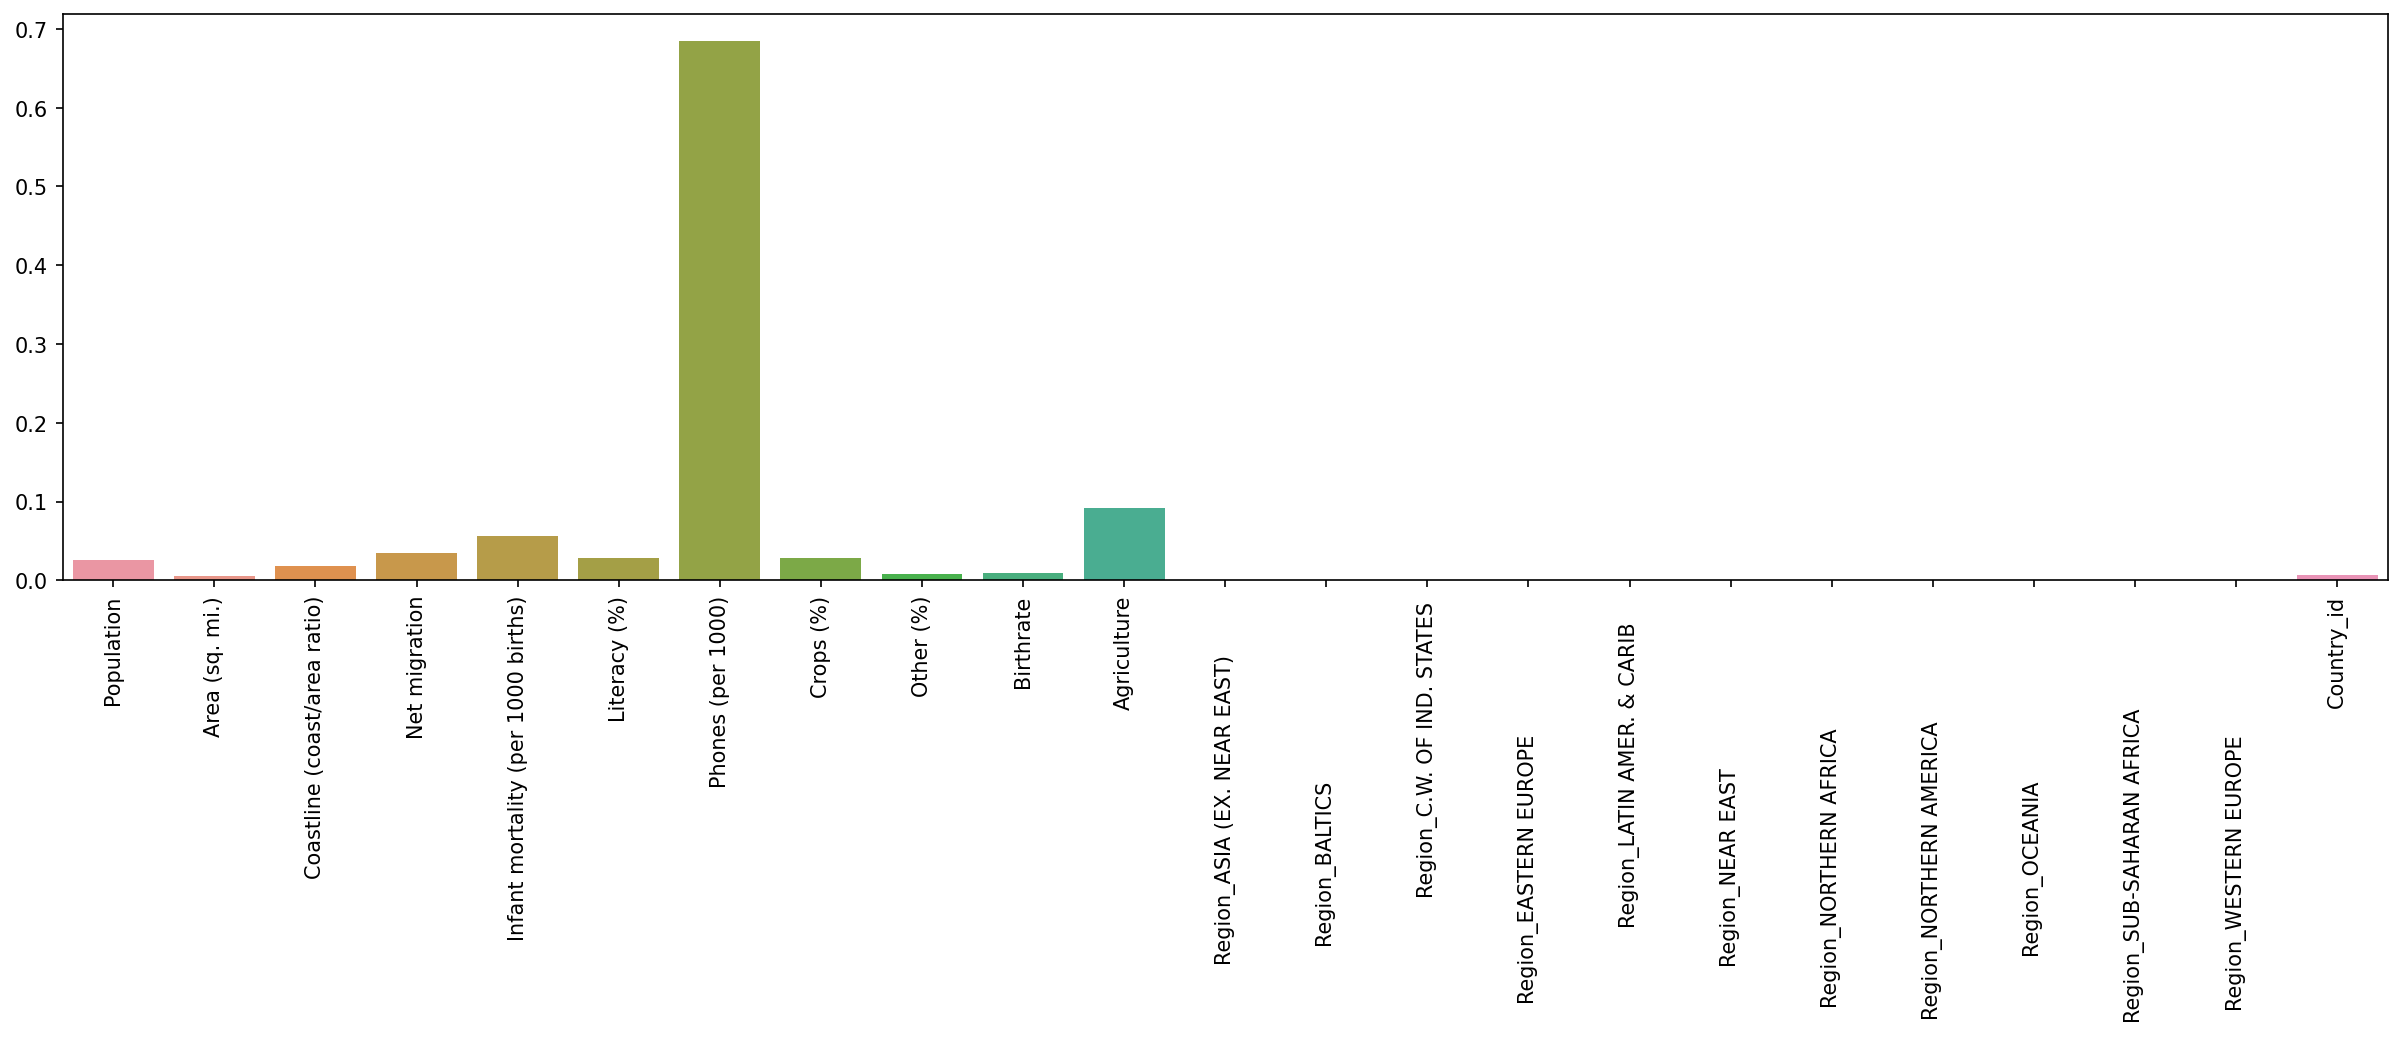

In [24]:
plt.figure(figsize=(20,5),dpi=150)
plt.xticks(rotation=90)
sns.barplot(x=X3.columns,y=fi)

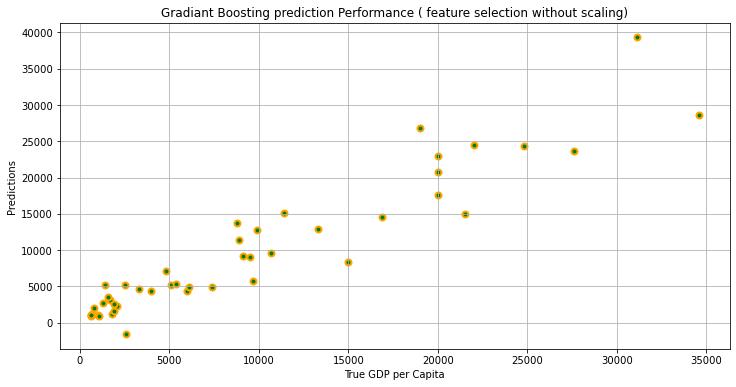

In [25]:
fig = plt.figure(figsize=(12, 6))
plt.scatter(y3_test,gbm3_pred,color='green', linewidths=2, edgecolors='orange')
plt.xlabel('True GDP per Capita') 
plt.ylabel('Predictions') 
plt.title('Gradiant Boosting prediction Performance ( feature selection without scaling)') 
plt.grid()
plt.show()

In [26]:
sc_X4 = StandardScaler()
X4_train = sc_X4.fit_transform(X3_train)
X4_test = sc_X4.fit_transform(X3_test)
y4_train = y3_train
y4_test = y3_test

In [27]:
gbm4 = GradientBoostingRegressor(learning_rate=0.1, n_estimators=200)
gbm4.fit(X4_train, y4_train)

GradientBoostingRegressor(n_estimators=200)

In [28]:
gbm4_pred = gbm4.predict(X4_test)
dfff = pd.DataFrame(data=y_test)
df9 = pd.DataFrame(data=gbm4_pred)
df9.index = dfff.index

dff=pd.concat([dfff,df9],axis=1,ignore_index=False)
dff.columns=['Actual','Predicted']
dff

,Actual,Predicted
65,700.000000,941.147572
54,31100.000000,19795.372813
185,13300.000000,14306.363738
80,20000.000000,12318.160203
33,600.000000,195.768836
201,7400.000000,5000.960572
37,1400.000000,4381.673575
218,4800.000000,10782.775016
199,1000.000000,389.197403
66,22000.000000,16716.229370


In [48]:
print('Gradiant Boosting Performance:')
print('selected features, with scaling:')
accuracy=gbm4.score(X4_test,y4_test)
train=gbm4.score(X4_train,y4_train) 
results_df = pd.DataFrame(data=[["gradient boosting perfromance",*evaluate(y_test,gbm4_pred) ,train,accuracy]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Train_Accuracy","Test_Accuracy"])
result_df=results_df
results_df

Gradiant Boosting Performance:
selected features, with scaling:


,Model,MAE,MSE,RMSE,R2 Square,Train_Accuracy,Test_Accuracy
0,gradient boosting perfromance,2896.250968,1.653819e+07,4066.716891,0.797413,0.999127,0.797413


In [30]:
fi=np.array(gbm4.feature_importances_)
print(fi)

[2.63328607e-02 4.68646347e-03 1.79069770e-02 3.51157977e-02
 5.50551696e-02 2.86643469e-02 6.84616913e-01 2.91959751e-02
 8.34026178e-03 9.97973065e-03 9.14332907e-02 1.29622282e-04
 0.00000000e+00 2.14721420e-04 1.85126794e-04 9.91644247e-05
 2.82684222e-04 2.40482572e-04 2.76754556e-04 4.29407091e-05
 8.54088782e-05 6.02239610e-04 6.51306774e-03]


<AxesSubplot:>

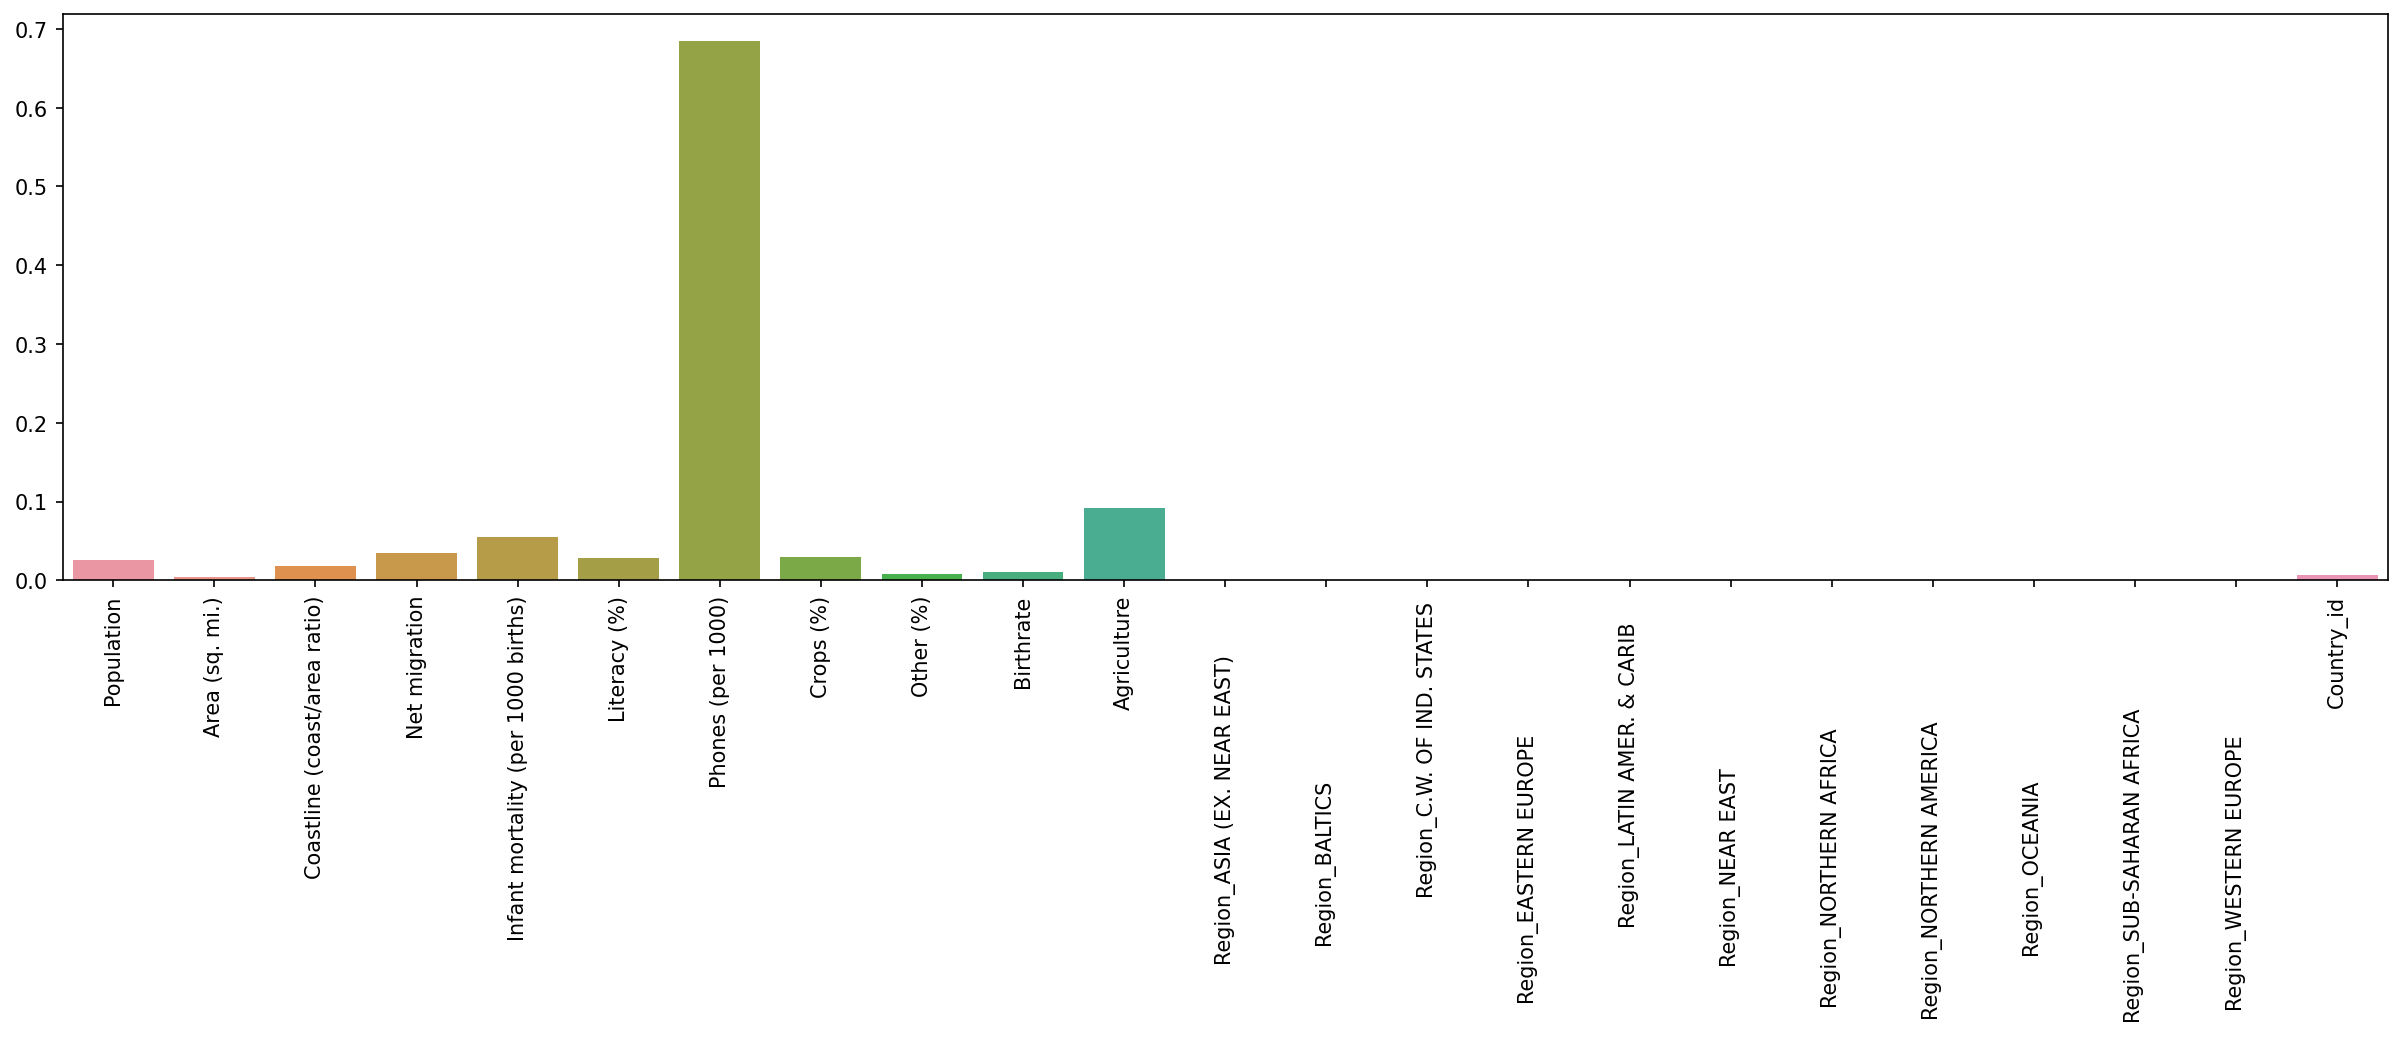

In [31]:
plt.figure(figsize=(20,5),dpi=150)
plt.xticks(rotation=90)
sns.barplot(x=X3.columns,y=fi)

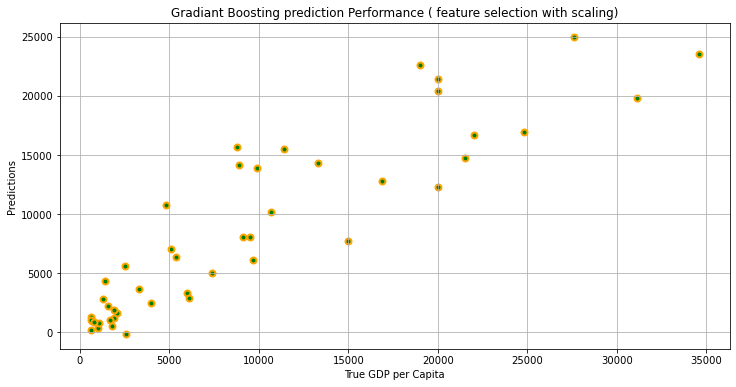

In [32]:
fig = plt.figure(figsize=(12, 6))
plt.scatter(y4_test,gbm4_pred,color='green', linewidths=2, edgecolors='orange')
plt.xlabel('True GDP per Capita') 
plt.ylabel('Predictions') 
plt.title('Gradiant Boosting prediction Performance ( feature selection with scaling)') 
plt.grid()
plt.show()

In [33]:
Final_file_GBR = GradientBoostingRegressor(learning_rate=0.1, n_estimators=500)

In [34]:
Final_file_GBR.fit(X3_train, y3_train)

GradientBoostingRegressor(n_estimators=500)

In [35]:
dump(Final_file_GBR,'GDP_per_capita_prediction.joblib')

['GDP_per_capita_prediction.joblib']

In [36]:
GDP1.iloc[0]

Population                                    31056997.00
Area (sq. mi.)                                  647500.00
Pop. Density (per sq. mi.)                          48.00
Coastline (coast/area ratio)                         0.00
Net migration                                       23.06
Infant mortality (per 1000 births)                 163.07
GDP ($ per capita)                                 700.00
Literacy (%)                                        36.00
Phones (per 1000)                                    3.20
Arable (%)                                          12.13
Crops (%)                                            0.22
Other (%)                                           87.65
Climate                                              1.00
Birthrate                                           46.60
Deathrate                                           20.34
Agriculture                                          0.38
Industry                                             0.24
Service       

In [37]:
predictor_GBR=load('GDP_per_capita_prediction.joblib')

In [38]:
predictor_GBR.predict([[31056997.00,647500.00,0.00,23.06,163.07,36.00,3.20,0.22,87.65,46.60,0.38,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]])

array([689.48638527])

In [39]:
import pickle

In [40]:
pickle_out=open("./Final_file_GBR.sav","wb")
pickle.dump(Final_file_GBR,pickle_out)

In [41]:
pickle_out.close()

In [42]:
model=pickle.load(open("Final_file_GBR.sav",'rb'))

In [43]:
model.predict([[31056997.00,647500.00,0.00,23.06,163.07,36.00,3.20,0.22,87.65,46.60,0.38,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]])

array([689.48638527])